<a href="https://colab.research.google.com/github/ReAlex1902/ML/blob/master/sem10/%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80_SVM_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Add required imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
import seaborn as sns
#подключите модуль SCV

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

In [16]:
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



ЗАДАНИЕ! Сделайте рисунки, позволяющие видеть разделяющие прямые

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


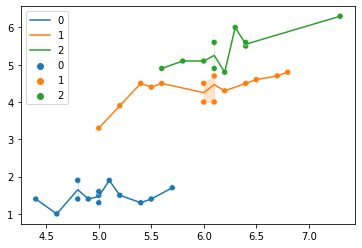

In [40]:
sns.scatterplot(X_test[:, 0], X_test[:, 2], hue = preds, palette = sns.color_palette(None, 3));
sns.lineplot(X_test[:, 0], X_test[:, 2], hue = preds, palette = sns.color_palette(None, 3));